In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import tweepy
import configparser

In [2]:
api_key = "APEDWnbf8cO64ui02UB6YXuEx"
api_key_secret = "WXk3iBxdOaaQspDDhfWSXdYQoBZoqnHgsCKT6yyNFlxgV6xTUW"

access_token = "1526337205337202689-aMQw7oSLYmx0lo1szlJ9wDU2JHsV9q"
access_token_secret = "1KxurDw0K9z8c8HH6rJSpon1HAmuhirELXvp8Nbupfq9L"

# authentication
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [7]:
def fetch_data():

    # Tickers on what we search the tweets
    tickers = ['#bitcoin', '#gold','#Altcoin', '#Coindesk','#Cryptocurrency','#APPL','#GOOG','#YHOO']
    # Present the limit is set to 10 to save the computational time
    limit=10

    # Creating a datafram in wich the tweets extracted are stored
    df = pd.DataFrame(columns = ['Created At', 'User', 'Tweet', 'Location', 'Tickers'])
    data = []
    # Specifing the duration of time span in which the tweets are extracted
    date_list=["2022-07-01","2022-07-02","2022-07-03","2022-07-04","2022-07-05","2022-07-06","2022-07-07"]
    #Extracting the tweets
    for ticker in tickers:
        for date in date_list:
            
            tweets = tweepy.Cursor(api.search, q=ticker,until=date,lang="en", tweet_mode='extended').items(limit)
            # Defining the columns
            columns = ['Created At', 'User', 'Tweet', 'Location']

            for tweet in tweets:
                # Append all tweets for the ticker
                data.append([tweet.created_at, tweet.user.screen_name,tweet.full_text,tweet.user.location])
                print(tweet.created_at)
            print(data)
            ticker_df = pd.DataFrame(data, columns=columns) # All tweets for 1 ticker

            # Generate new column to classify tweets and ticker
            query_labels = pd.Series([ticker]).repeat(len(ticker_df))
            query_labels_df = query_labels.to_frame(name="Tickers").reset_index(drop=True)

            intermed_ticker_df = pd.concat([ticker_df, query_labels_df], axis=1)
            time.sleep(30)
            # Append to final df
            df = pd.concat([df, intermed_ticker_df], axis=0)
    return df

In [8]:
df = fetch_data()

2022-06-30 23:59:59
2022-06-30 23:59:59
2022-06-30 23:59:57
2022-06-30 23:59:56
2022-06-30 23:59:56
2022-06-30 23:59:56
2022-06-30 23:59:55
2022-06-30 23:59:55
2022-06-30 23:59:54
2022-06-30 23:59:54
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-03 23:59:58
2022-07-03 23:59:56
2022-07-03 23:59:54
2022-07-03 23:59:54
2022-07-03 23:59:53
2022-07-03 23:59:52
2022-07-03 23:59:50
2022-07-03 23:59:50
2022-07-03 23:59:48
2022-07-03 23:59:48
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-04 23:59:59
2022-07-04 23:59:59
2022-07-04 23:59:56
2022-07-04 23:59:55
2022-07-04 23:59:53
2022-07-04 23:59:52
2022-07-04 23:59:50
2022-07-04 23:59:49
2022-07-04 23:59:49
2022-07-04 23:59:47
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-05 23:59:59
2022-07-05 23:59:58
2022-07-05 23:59:57
2022-07-05 23:59:57
2022-07-05 23:59:56
2022-07-05 23:59:55
2022-07-05 23:59:54
2022-07-05 23:59:54
2022-07-05 23:59:51
2022-07-05 23:59:50
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-06 23:59:58
2022-07-06 23:59:57
2022-07-06 23:59:56
2022-07-06 23:59:55
2022-07-06 23:59:52
2022-07-06 23:59:51
2022-07-06 23:59:50
2022-07-06 23:59:48
2022-07-06 23:59:46
2022-07-06 23:59:45
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-06-30 23:59:44
2022-06-30 23:58:58
2022-06-30 23:58:18
2022-06-30 23:57:57
2022-06-30 23:57:36
2022-06-30 23:57:13
2022-06-30 23:56:12
2022-06-30 23:56:11
2022-06-30 23:55:36
2022-06-30 23:55:33
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-01 23:59:31
2022-07-01 23:59:06
2022-07-01 23:57:31
2022-07-01 23:56:12
2022-07-01 23:55:58
2022-07-01 23:55:21
2022-07-01 23:54:18
2022-07-01 23:54:09
2022-07-01 23:53:45
2022-07-01 23:51:30
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-02 23:59:20
2022-07-02 23:59:13
2022-07-02 23:58:58
2022-07-02 23:56:52
2022-07-02 23:56:04
2022-07-02 23:54:14
2022-07-02 23:53:48
2022-07-02 23:53:35
2022-07-02 23:53:01
2022-07-02 23:52:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-03 23:59:49
2022-07-03 23:59:29
2022-07-03 23:58:56
2022-07-03 23:58:46
2022-07-03 23:58:30
2022-07-03 23:57:18
2022-07-03 23:56:03
2022-07-03 23:55:32
2022-07-03 23:55:25
2022-07-03 23:53:34
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-04 23:59:54
2022-07-04 23:59:49
2022-07-04 23:59:38
2022-07-04 23:58:53
2022-07-04 23:57:02
2022-07-04 23:56:48
2022-07-04 23:56:28
2022-07-04 23:55:48
2022-07-04 23:55:11
2022-07-04 23:55:09
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-05 23:59:26
2022-07-05 23:59:25
2022-07-05 23:59:01
2022-07-05 23:58:54
2022-07-05 23:58:49
2022-07-05 23:58:47
2022-07-05 23:58:34
2022-07-05 23:58:33
2022-07-05 23:58:32
2022-07-05 23:56:45
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-06 23:59:57
2022-07-06 23:59:37
2022-07-06 23:59:34
2022-07-06 23:59:00
2022-07-06 23:58:04
2022-07-06 23:55:56
2022-07-06 23:55:03
2022-07-06 23:54:05
2022-07-06 23:53:01
2022-07-06 23:52:57
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-06-30 23:59:30
2022-06-30 23:58:13
2022-06-30 23:57:25
2022-06-30 23:57:10
2022-06-30 23:56:55
2022-06-30 23:56:29
2022-06-30 23:56:27
2022-06-30 23:55:45
2022-06-30 23:55:03
2022-06-30 23:54:48
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-01 23:59:57
2022-07-01 23:59:34
2022-07-01 23:57:29
2022-07-01 23:57:27
2022-07-01 23:57:25
2022-07-01 23:57:10
2022-07-01 23:56:57
2022-07-01 23:56:43
2022-07-01 23:56:25
2022-07-01 23:56:25
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-02 23:59:41
2022-07-02 23:59:10
2022-07-02 23:59:02
2022-07-02 23:58:58
2022-07-02 23:57:13
2022-07-02 23:57:04
2022-07-02 23:56:31
2022-07-02 23:56:00
2022-07-02 23:55:57
2022-07-02 23:55:47
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-03 23:59:59
2022-07-03 23:59:43
2022-07-03 23:59:42
2022-07-03 23:59:37
2022-07-03 23:59:31
2022-07-03 23:59:31
2022-07-03 23:59:24
2022-07-03 23:59:18
2022-07-03 23:59:08
2022-07-03 23:58:51
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-04 23:59:51
2022-07-04 23:59:38
2022-07-04 23:59:21
2022-07-04 23:59:16
2022-07-04 23:59:12
2022-07-04 23:58:59
2022-07-04 23:58:54
2022-07-04 23:57:54
2022-07-04 23:57:51
2022-07-04 23:57:18
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-05 23:59:57
2022-07-05 23:59:46
2022-07-05 23:56:32
2022-07-05 23:56:21
2022-07-05 23:56:11
2022-07-05 23:56:06
2022-07-05 23:54:55
2022-07-05 23:54:29
2022-07-05 23:54:15
2022-07-05 23:53:52
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-06 23:59:59
2022-07-06 23:59:37
2022-07-06 23:59:31
2022-07-06 23:59:03
2022-07-06 23:58:50
2022-07-06 23:58:24
2022-07-06 23:57:41
2022-07-06 23:56:25
2022-07-06 23:55:15
2022-07-06 23:55:08
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-06-30 22:00:02
2022-06-30 21:32:02
2022-06-30 21:22:25
2022-06-30 20:38:50
2022-06-30 20:16:16
2022-06-30 20:00:02
2022-06-30 19:45:30
2022-06-30 19:22:44
2022-06-30 18:32:37
2022-06-30 18:27:57
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-01 23:04:01
2022-07-01 22:00:03
2022-07-01 20:55:54
2022-07-01 20:14:16
2022-07-01 20:00:03
2022-07-01 18:43:03
2022-07-01 18:00:03
2022-07-01 17:42:22
2022-07-01 17:00:13
2022-07-01 16:31:21
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-02 23:07:45
2022-07-02 22:00:03
2022-07-02 20:09:04
2022-07-02 20:07:01
2022-07-02 20:00:03
2022-07-02 18:26:26
2022-07-02 18:00:03
2022-07-02 17:02:49
2022-07-02 16:00:02
2022-07-02 14:00:03
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-03 23:18:20
2022-07-03 22:00:03
2022-07-03 21:26:19
2022-07-03 21:14:02
2022-07-03 20:16:40
2022-07-03 20:00:03
2022-07-03 18:00:03
2022-07-03 16:56:24
2022-07-03 16:44:36
2022-07-03 16:22:31
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-04 22:42:40
2022-07-04 22:00:04
2022-07-04 20:08:55
2022-07-04 20:05:25
2022-07-04 20:00:03
2022-07-04 19:00:24
2022-07-04 18:00:02
2022-07-04 16:39:02
2022-07-04 16:00:03
2022-07-04 15:00:03
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-05 22:00:02
2022-07-05 20:00:02
2022-07-05 19:54:16
2022-07-05 18:00:06
2022-07-05 18:00:02
2022-07-05 17:36:37
2022-07-05 17:16:36
2022-07-05 17:15:20
2022-07-05 16:41:03
2022-07-05 16:06:53
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-06 22:00:02
2022-07-06 20:00:03
2022-07-06 18:00:03
2022-07-06 16:00:03
2022-07-06 14:00:02
2022-07-06 13:57:37
2022-07-06 13:57:04
2022-07-06 13:26:53
2022-07-06 12:00:03
2022-07-06 11:07:43
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-06-30 23:59:59
2022-06-30 23:59:55
2022-06-30 23:59:53
2022-06-30 23:59:52
2022-06-30 23:59:49
2022-06-30 23:59:44
2022-06-30 23:59:39
2022-06-30 23:59:33
2022-06-30 23:59:29
2022-06-30 23:59:19
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-01 23:59:57
2022-07-01 23:59:52
2022-07-01 23:59:45
2022-07-01 23:59:44
2022-07-01 23:59:43
2022-07-01 23:59:35
2022-07-01 23:59:34
2022-07-01 23:59:22
2022-07-01 23:59:20
2022-07-01 23:59:18
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-02 23:59:57
2022-07-02 23:59:52
2022-07-02 23:59:49
2022-07-02 23:59:49
2022-07-02 23:59:49
2022-07-02 23:59:48
2022-07-02 23:59:45
2022-07-02 23:59:42
2022-07-02 23:59:40
2022-07-02 23:59:40
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-03 23:59:58
2022-07-03 23:59:55
2022-07-03 23:59:55
2022-07-03 23:59:52
2022-07-03 23:59:51
2022-07-03 23:59:51
2022-07-03 23:59:49
2022-07-03 23:59:47
2022-07-03 23:59:47
2022-07-03 23:59:45
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-04 23:59:54
2022-07-04 23:59:54
2022-07-04 23:59:52
2022-07-04 23:59:51
2022-07-04 23:59:51
2022-07-04 23:59:47
2022-07-04 23:59:47
2022-07-04 23:59:46
2022-07-04 23:59:43
2022-07-04 23:59:41
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-05 23:59:58
2022-07-05 23:59:57
2022-07-05 23:59:53
2022-07-05 23:59:43
2022-07-05 23:59:40
2022-07-05 23:59:38
2022-07-05 23:59:23
2022-07-05 23:59:21
2022-07-05 23:59:17
2022-07-05 23:59:16
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-06 23:59:57
2022-07-06 23:59:56
2022-07-06 23:59:52
2022-07-06 23:59:45
2022-07-06 23:59:44
2022-07-06 23:59:44
2022-07-06 23:59:43
2022-07-06 23:59:37
2022-07-06 23:59:37
2022-07-06 23:59:34
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-06-30 21:21:25
2022-06-30 19:00:02
2022-06-30 17:00:03
2022-06-30 15:00:03
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'AndersTintin', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Norway, Alberta'], [dat

2022-07-01 23:27:30
2022-07-01 19:00:03
2022-07-01 17:00:02
2022-07-01 15:00:02
2022-07-01 12:35:43
2022-07-01 00:01:00
2022-06-30 21:21:25
2022-06-30 19:00:02
2022-06-30 17:00:03
2022-06-30 15:00:03
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-02 21:47:00
2022-07-01 23:27:30
2022-07-01 19:00:03
2022-07-01 17:00:02
2022-07-01 15:00:02
2022-07-01 12:35:43
2022-07-01 00:01:00
2022-06-30 21:21:25
2022-06-30 19:00:02
2022-06-30 17:00:03
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-03 19:18:03
2022-07-03 07:25:26
2022-07-03 02:46:20
2022-07-03 01:04:24
2022-07-02 21:47:00
2022-07-01 23:27:30
2022-07-01 19:00:03
2022-07-01 17:00:02
2022-07-01 15:00:02
2022-07-01 12:35:43
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-04 10:45:35
2022-07-04 10:11:09
2022-07-03 19:18:03
2022-07-03 07:25:26
2022-07-03 02:46:20
2022-07-03 01:04:24
2022-07-02 21:47:00
2022-07-01 23:27:30
2022-07-01 19:00:03
2022-07-01 17:00:02
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-05 22:55:19
2022-07-05 22:49:30
2022-07-05 21:30:17
2022-07-05 19:54:25
2022-07-05 19:07:26
2022-07-05 19:00:02
2022-07-05 06:49:33
2022-07-04 10:45:35
2022-07-04 10:11:09
2022-07-03 19:18:03
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-06 22:03:30
2022-07-06 20:47:41
2022-07-06 20:47:37
2022-07-06 06:35:19
2022-07-06 06:34:51
2022-07-06 06:07:27
2022-07-06 05:06:15
2022-07-06 05:06:14
2022-07-06 05:06:00
2022-07-06 05:01:38
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-06-30 22:17:23
2022-06-30 22:02:10
2022-06-30 21:59:46
2022-06-30 21:57:00
2022-06-30 20:57:19
2022-06-30 20:53:47
2022-06-30 20:23:46
2022-06-30 18:13:17
2022-06-30 15:35:42
2022-06-30 15:35:13
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-01 23:38:09
2022-07-01 22:53:47
2022-07-01 22:23:46
2022-07-01 21:57:11
2022-07-01 19:13:26
2022-07-01 17:31:41
2022-07-01 17:13:56
2022-07-01 16:57:52
2022-07-01 16:57:35
2022-07-01 16:57:21
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-02 23:57:42
2022-07-02 19:28:57
2022-07-02 14:56:25
2022-07-02 14:55:06
2022-07-02 14:39:09
2022-07-02 11:23:46
2022-07-02 05:23:46
2022-07-02 03:21:41
2022-07-02 03:19:37
2022-07-02 02:30:13
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-03 21:45:46
2022-07-03 19:53:46
2022-07-03 15:29:10
2022-07-03 13:51:28
2022-07-03 13:23:47
2022-07-03 07:23:46
2022-07-03 06:53:46
2022-07-03 02:30:13
2022-07-03 01:56:13
2022-07-03 00:24:01
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-04 23:47:26
2022-07-04 21:53:46
2022-07-04 15:23:46
2022-07-04 12:45:50
2022-07-04 09:59:16
2022-07-04 03:50:20
2022-07-04 02:30:14
2022-07-03 21:45:46
2022-07-03 19:53:46
2022-07-03 15:29:10
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-05 23:53:51
2022-07-05 23:53:46
2022-07-05 19:00:12
2022-07-05 19:00:02
2022-07-05 17:53:47
2022-07-05 17:23:47
2022-07-05 15:51:08
2022-07-05 15:23:05
2022-07-05 15:07:35
2022-07-05 13:33:49
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

2022-07-06 20:55:54
2022-07-06 19:53:46
2022-07-06 19:23:47
2022-07-06 18:33:23
2022-07-06 13:49:07
2022-07-06 13:23:47
2022-07-06 12:53:46
2022-07-06 09:29:54
2022-07-06 06:23:46
2022-07-06 02:30:14
[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'An

[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'AndersTintin', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Norway, Alberta'], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'Neverbigwin00', 'RT @OfficialTravlad: 

[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'AndersTintin', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Norway, Alberta'], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'Neverbigwin00', 'RT @OfficialTravlad: 

[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'AndersTintin', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Norway, Alberta'], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'Neverbigwin00', 'RT @OfficialTravlad: 

[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'AndersTintin', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Norway, Alberta'], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'Neverbigwin00', 'RT @OfficialTravlad: 

[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'AndersTintin', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Norway, Alberta'], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'Neverbigwin00', 'RT @OfficialTravlad: 

[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'AndersTintin', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Norway, Alberta'], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'Neverbigwin00', 'RT @OfficialTravlad: 

[[datetime.datetime(2022, 6, 30, 23, 59, 59), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'AndersTintin', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Norway, Alberta'], [datetime.datetime(2022, 6, 30, 23, 59, 56), 'Neverbigwin00', 'RT @OfficialTravlad: 

In [9]:
df

,Created At,User,Tweet,Location,Tickers
0,2022-06-30 23:59:59,EngieFord,RT @IncomeSharks: From July 1st to November 1s...,,#bitcoin
1,2022-06-30 23:59:59,DeepStar22,RT @OfficialTravlad: What tf is this #Bitcoin ...,"New Delhi, India",#bitcoin
2,2022-06-30 23:59:57,nerivansouza01,RT @milkshake_io: MicroStrategy chief executiv...,,#bitcoin
3,2022-06-30 23:59:56,EngieFord,RT @CedYoungelman: Your home is not worth more...,,#bitcoin
4,2022-06-30 23:59:56,AndersTintin,RT @OfficialTravlad: What tf is this #Bitcoin ...,"New Norway, Alberta",#bitcoin
...,...,...,...,...,...
479,2022-07-06 13:23:47,leoventuresllc,Google is the internet !! #google #googl #goog...,"Chicago, IL",#YHOO
480,2022-07-06 12:53:46,leoventuresllc,Google...What Can I Say !! #google #googl #sto...,"Chicago, IL",#YHOO
481,2022-07-06 09:29:54,iob_fi,RT @IOB_llc: #Google #GOOG #TechnicalIndicator...,global,#YHOO
482,2022-07-06 06:23:46,leoventuresllc,Google...What Can I Say !! #google #googl #sto...,"Chicago, IL",#YHOO


In [101]:
df['Created_Date'] = pd.to_datetime(df['Created At']).dt.date

In [102]:
df.Created_Date.unique()

array([datetime.date(2022, 6, 30), datetime.date(2022, 7, 1),
       datetime.date(2022, 7, 2), datetime.date(2022, 7, 3),
       datetime.date(2022, 7, 4), datetime.date(2022, 7, 5),
       datetime.date(2022, 7, 6)], dtype=object)

In [103]:
df.to_csv('stock_tweets.csv')

In [104]:
df2=df.copy(deep=True)

In [105]:
df2.shape

(15554, 6)

In [106]:
df3=df.drop_duplicates(subset=None, keep='first')

In [107]:
df3.shape

(2310, 6)

In [113]:
# Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub(r'\W*\b\w{1,2}\b', '', text) # Removing wordls less than length of 2
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text
df3["Tweet"] = df3["Tweet"].apply(cleanTxt)
df3

C:\Users\thaks\AppData\Local\Temp/ipykernel_676/2775745034.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Tweet"] = df3["Tweet"].apply(cleanTxt)


,Created At,User,Tweet,Location,Tickers,Created_Date
0,2022-06-30 23:59:59,EngieFord,": From July 1st November 1st buying,000 worth...",,#bitcoin,2022-06-30
1,2022-06-30 23:59:59,DeepStar22,": What this Bitcoin candle, looks manipulated…","New Delhi, India",#bitcoin,2022-06-30
2,2022-06-30 23:59:57,nerivansouza01,_io: MicroStrategy chief executive Michael Sa...,,#bitcoin,2022-06-30
3,2022-06-30 23:59:56,EngieFord,: Your home not worth more. \n\nYour money ju...,,#bitcoin,2022-06-30
4,2022-06-30 23:59:56,AndersTintin,": What this Bitcoin candle, looks manipulated…","New Norway, Alberta",#bitcoin,2022-06-30
...,...,...,...,...,...,...
479,2022-07-06 13:23:47,leoventuresllc,Google the internet !! google googl goog stock...,"Chicago, IL",#YHOO,2022-07-06
480,2022-07-06 12:53:46,leoventuresllc,Google...What Can Say !! google googl stock te...,"Chicago, IL",#YHOO,2022-07-06
481,2022-07-06 09:29:54,iob_fi,_llc: Google GOOG TechnicalIndicator Market T...,global,#YHOO,2022-07-06
482,2022-07-06 06:23:46,leoventuresllc,Google...What Can Say !! google googl stock te...,"Chicago, IL",#YHOO,2022-07-06


In [114]:
tickers = ['#bitcoin', '#gold','#Altcoin', '#Coindesk','#Cryptocurrency','#APPL','#GOOG','#YHOO']
df3['Created At'] = pd.to_datetime(df3['Created At'])

start_date='2022-07-01'

end_date='2022-07-07'

tweets_in_past_day = []

for ticker in tickers:

    mask = (df3['Created At'] > start_date) & (df3['Created At'] <= end_date) & (df3['Tickers'] == ticker)    
    num_tweets = len(df3.loc[mask])
    tweets_in_past_day.append(num_tweets)

C:\Users\thaks\AppData\Local\Temp/ipykernel_676/2577241891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Created At'] = pd.to_datetime(df3['Created At'])


In [115]:
tweets_in_past_day

[60, 120, 180, 240, 295, 325, 381, 381]

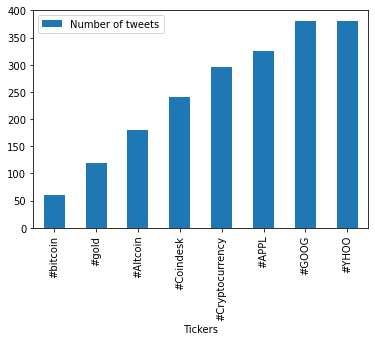

In [116]:
visualization1 = pd.DataFrame({'Tickers':tickers, 'Number of tweets':tweets_in_past_day})
ax = visualization1.plot.bar(x='Tickers', y='Number of tweets')

In [118]:
start_date='2022-07-01'

end_date='2022-07-07'

distinct_users_in_past_day = []

for ticker in tickers:
    mask = (df3['Created At'] > start_date) & (df3['Created At'] <= end_date) & (df3['Tickers'] == ticker)    
    num_users = df3.loc[mask]
    n = len(pd.unique(num_users['User']))
    distinct_users_in_past_day.append(n)

Number of tweets for tickers in the 7 days (July 1, 2022 - July 7, 2022)

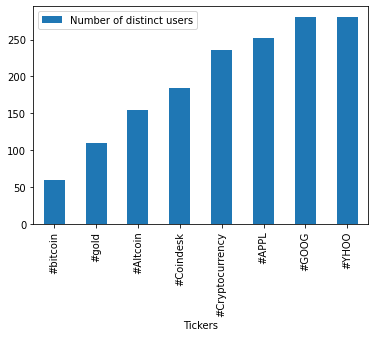

In [119]:
visualization2 = pd.DataFrame({'Tickers':tickers, 'Number of distinct users':distinct_users_in_past_day})
ax = visualization2.plot.bar(x='Tickers', y='Number of distinct users', rot=90)

In [120]:
df3.to_csv('stock.csv') 

In [121]:
df3=df2.drop_duplicates(subset=None, keep='first')

In [122]:
df3.Tickers.unique()

array(['#bitcoin', '#gold', '#Altcoin', '#Coindesk', '#Cryptocurrency',
       '#APPL', '#GOOG', '#YHOO'], dtype=object)

In [123]:
bitcoin=df3[df3['Tickers']=="#bitcoin"]

In [124]:
bitcoin

,Created At,User,Tweet,Location,Tickers,Created_Date
0,2022-06-30 23:59:59,EngieFord,RT @IncomeSharks: From July 1st to November 1s...,,#bitcoin,2022-06-30
1,2022-06-30 23:59:59,DeepStar22,RT @OfficialTravlad: What tf is this #Bitcoin ...,"New Delhi, India",#bitcoin,2022-06-30
2,2022-06-30 23:59:57,nerivansouza01,RT @milkshake_io: MicroStrategy chief executiv...,,#bitcoin,2022-06-30
3,2022-06-30 23:59:56,EngieFord,RT @CedYoungelman: Your home is not worth more...,,#bitcoin,2022-06-30
4,2022-06-30 23:59:56,AndersTintin,RT @OfficialTravlad: What tf is this #Bitcoin ...,"New Norway, Alberta",#bitcoin,2022-06-30
...,...,...,...,...,...,...
65,2022-07-06 23:59:51,HMitke,RT @saylor: “Bitcoin is a monetary instrument ...,,#bitcoin,2022-07-06
66,2022-07-06 23:59:50,stillbtc,RT @aiproenergy: Immersion fluid is more effic...,Thinking Green,#bitcoin,2022-07-06
67,2022-07-06 23:59:48,hann_marie22,"RT @MartiniGuyYT: If #Bitcoin doesn’t hit $26,...",507 proofs,#bitcoin,2022-07-06
68,2022-07-06 23:59:46,daleperozzo,RT @TheCryptoLark: How Investing In Crypto Act...,Earth,#bitcoin,2022-07-06


In [74]:
bitcoin=df3[df3['Tickers']=="#bitcoin"]
bitcoin.to_csv('bitcoin.csv') 

In [75]:
gold=df3[df3['Tickers']=="#gold"]
gold.to_csv('gold.csv') 

In [76]:
Altcoin=df3[df3['Tickers']=="#Altcoin"]
Altcoin.to_csv('Altcoin.csv') 

In [77]:
Coindesk=df3[df3['Tickers']=="#Coindesk"]
Coindesk.to_csv('Coindesk.csv') 

In [78]:
Cryptocurrency=df3[df3['Tickers']=="#Cryptocurrency"]
Cryptocurrency.to_csv('Cryptocurrency.csv') 

In [79]:
APPL=df3[df3['Tickers']=="#APPL"]
APPL.to_csv('APPL.csv') 

In [80]:
GOOG=df3[df3['Tickers']=="#GOOG"]
GOOG.to_csv('GOOG.csv') 

In [47]:
YHOO=df3[df3['Tickers']=="#YHOO"]
YHOO.to_csv('YHOO.csv') 